<a href="https://colab.research.google.com/github/sanjay-venkitesh/ztf-summer-school-application/blob/main/ztf_summer_school_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Application Question

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The demo data set for this part is the Wesenheit index of the OGLE-III fundamental-mode and first overtone classical Cepheids. 

These stars are awesome because you can use them to measure distances. Here's a nice [youtube video](https://www.youtube.com/watch?v=iyisAjHdhas) on these stars.

You'll try to estimate their period-luminosity relationship. 

The Wesenheit index is defined as `W = I - 1.55(V - I)`, and its main advantage over using simply the I or V photometry is that it is insensitive to extinction. It is denoted by 'W' among the data columns. 

Other columns are 'name', the identifier of the star; 'RA0' (in decimal hours) and 'Decl0' (in decimal degrees), celestial coordinates; 'Mode', the mode of the Cepheid ('F' indicates fundamental-mode, '1' indicates first overtone star); 'Cloud', indicating which Magellanic Cloud the star belongs to; 'logP1', the base-10 logarithm of the period in days; 'VI', the colour V-I.

We split the data into LMC and SMC, and then again by mode F and 1 (for you) below:

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read in the csv data file using Pandas
cep = pd.read_csv("Cepheids.csv")

# display the columns
print(cep.columns)

Index(['name', 'RA0', 'Decl0', 'Mode', 'Cloud', 'W', 'logP1', 'VI'], dtype='object')


In [2]:
#select Cepheids belonging to the LMC and SMC clouds with F and 1 modes
lmcf = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == 'F')]
smcf = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == 'F')]

lmco = cep[(cep['Cloud'] == 'LMC') & (cep['Mode'] == '1')]
smco = cep[(cep['Cloud'] == 'SMC') & (cep['Mode'] == '1')]

## Part 1: plot the `W` on the y-axis vs `log(P1)` on x.

Text(0.5, 0.98, 'W vs log(P1) Plots')

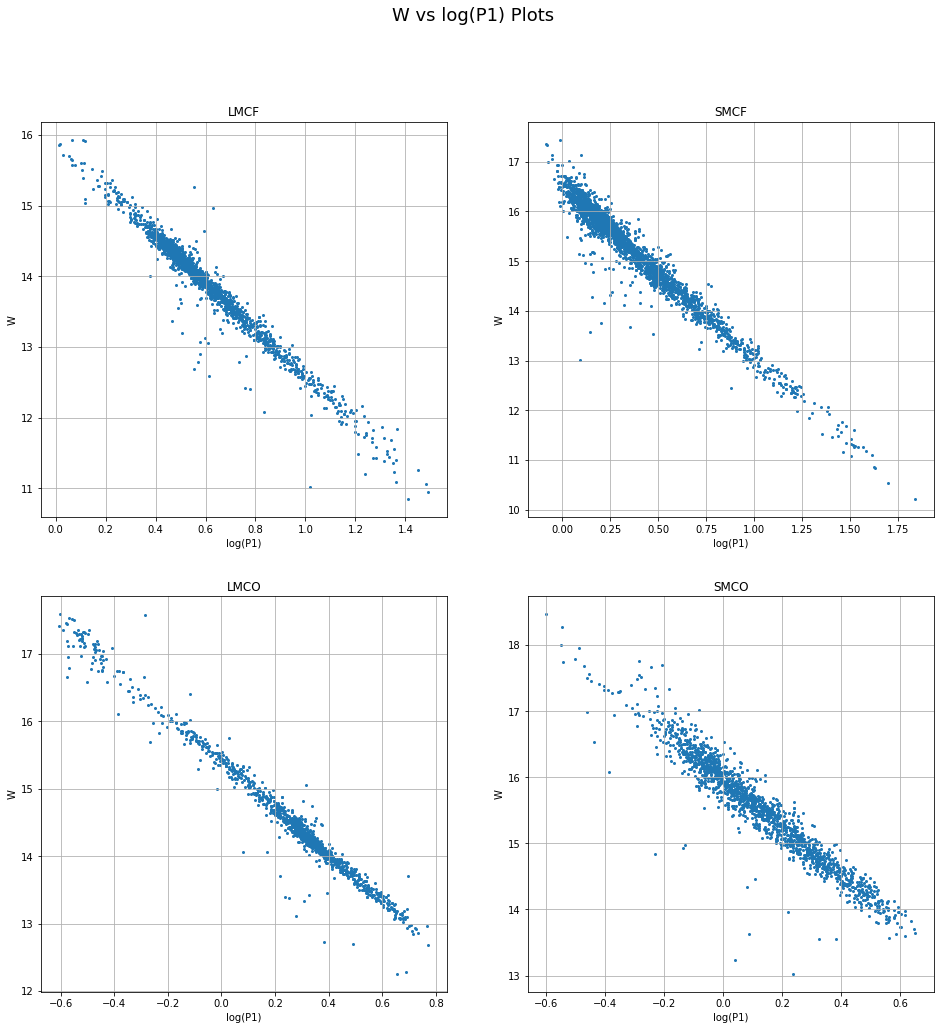

In [81]:
# YOUR CODE HERE
# LMCF
x1 = lmcf["logP1"].to_numpy()
y1 = lmcf["W"].to_numpy()

# SMCF
x2 = smcf["logP1"].to_numpy()
y2 = smcf["W"].to_numpy()

# LMCO
x3 = lmco["logP1"].to_numpy()
y3 = lmco["W"].to_numpy()

# SMCO
x4 = smco["logP1"].to_numpy()
y4 = smco["W"].to_numpy()

# Plotting
fig, ax = plt.subplots(2, 2,figsize=(16,16))
ax[0][0].scatter(x1, y1, s=4)
ax[0][0].grid()
ax[0][0].set_title(r'LMCF')
ax[0][0].set_xlabel(r"log(P1)")
ax[0][0].set_ylabel(r"W")

ax[0][1].scatter(x2, y2, s=4)
ax[0][1].grid()
ax[0][1].set_title(r'SMCF')
ax[0][1].set_xlabel(r"log(P1)")
ax[0][1].set_ylabel(r"W")

ax[1][0].scatter(x3, y3, s=4)
ax[1][0].grid()
ax[1][0].set_title(r'LMCO')
ax[1][0].set_xlabel(r"log(P1)")
ax[1][0].set_ylabel(r"W")

ax[1][1].scatter(x4, y4, s=4)
ax[1][1].grid()
ax[1][1].set_title(r'SMCO')
ax[1][1].set_xlabel(r"log(P1)")
ax[1][1].set_ylabel(r"W")

fig.suptitle(r"W vs log(P1) Plots", fontsize = 18)

## Part 2: Fit or estimate straight lines to each of the four samples
Note: You can use any fitting function/algorithm you like (i.e. statsmodels, astropy, scipy, numpy, etc..).

<class 'numpy.ndarray'>


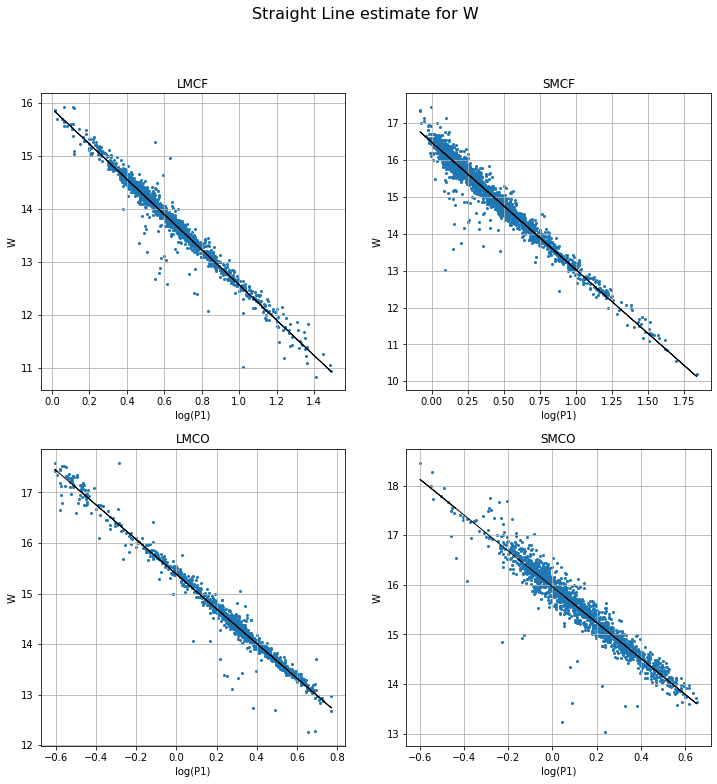

In [82]:
# YOUR CODE HERE
import numpy.polynomial.polynomial as poly

fig, ax = plt.subplots(2, 2,figsize=(12,12))

# LMCF
p1 = poly.polyfit(x1, y1, 1)
y1_fit = poly.polyval(x1, p1)
ax[0][0].plot(x1, y1_fit, c = 'k',  linewidth = "1")


ax[0][0].scatter(x1, y1, s=4)
ax[0][0].grid()
ax[0][0].set_title(r'LMCF')
ax[0][0].set_xlabel(r"log(P1)")
ax[0][0].set_ylabel(r"W")

# SMCF
p2 = poly.polyfit(x2, y2, 1)
y2_fit = poly.polyval(x2, p2)
ax[0][1].plot(x2, y2_fit, c = 'k', linewidth = "1")

ax[0][1].scatter(x2, y2, s=4)
ax[0][1].grid()
ax[0][1].set_title(r'SMCF')
ax[0][1].set_xlabel(r"log(P1)")
ax[0][1].set_ylabel(r"W")


# LMCO
p3 = poly.polyfit(x3, y3, 1)
y3_fit = poly.polyval(x3, p3)
ax[1][0].plot(x3, y3_fit, c = 'k', linewidth = "1")

ax[1][0].scatter(x3, y3, s=4)
ax[1][0].grid()
ax[1][0].set_title(r'LMCO')
ax[1][0].set_xlabel(r"log(P1)")
ax[1][0].set_ylabel(r"W")

# SMCO
p4 = poly.polyfit(x4, y4, 1)
y4_fit = poly.polyval(x4, p4)
ax[1][1].plot(x4, y4_fit, c = 'k', linewidth = "1")

ax[1][1].scatter(x4, y4, s=4)
ax[1][1].grid()
ax[1][1].set_title(r'SMCO')
ax[1][1].set_xlabel(r"log(P1)")
ax[1][1].set_ylabel(r"W")

fig.suptitle(r"Straight Line estimate for W", fontsize = 16)
plt.show()


## Part 3: Compute the residuals of each sample to its respective line.
Do these residuals look like a normal distribution? If not, speculate on why (WATCH THE YOUTUBE VIDEO!)

<class 'numpy.ndarray'>
[ 0.2747595   0.09402309  0.06243867 ...  0.07898083 -0.01778658
  0.02343984]


Text(0.5, 0.98, 'Residuals (Square Error) between actual and estimated values for W')

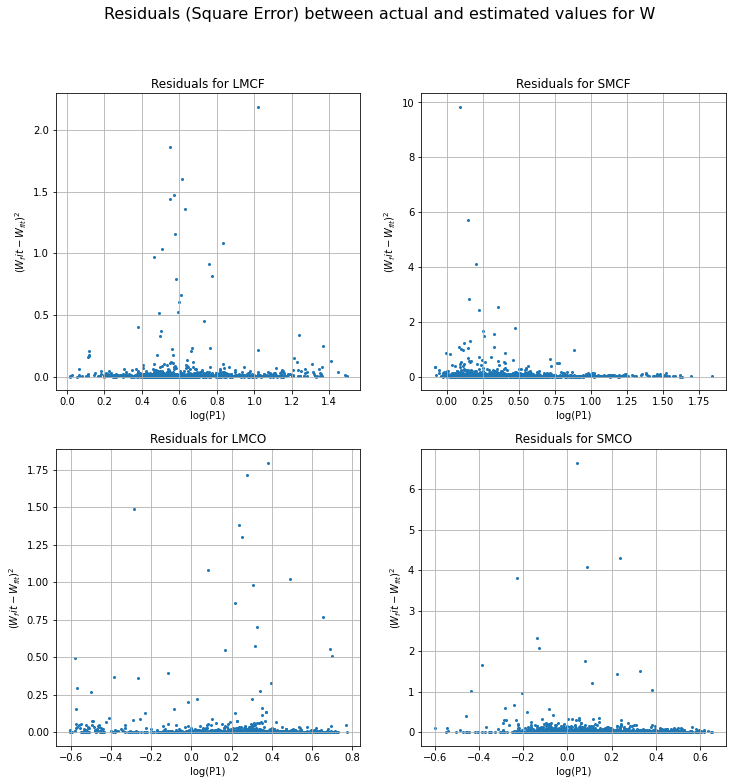

In [83]:
# YOUR CODE HERE
res1 = (y1 - y1_fit)
res2 = (y2 - y2_fit)
res3 = (y3 - y3_fit)
res4 = (y4 - y4_fit)

# Plotting the residuals
fig, ax = plt.subplots(2, 2,figsize=(12,12))
ax[0][0].scatter(x1, np.square(res1), s=4)
ax[0][0].grid()
ax[0][0].set_title(r'Residuals for LMCF')
ax[0][0].set_xlabel(r"log(P1)")
ax[0][0].set_ylabel(r"$(W_fit-W_{fit})^2$")

ax[0][1].scatter(x2, np.square(res2), s=4)
ax[0][1].grid()
ax[0][1].set_title(r'Residuals for SMCF')
ax[0][1].set_xlabel(r"log(P1)")
ax[0][1].set_ylabel(r"$(W_fit-W_{fit})^2$")

ax[1][0].scatter(x3, np.square(res3), s=4)
ax[1][0].grid()
ax[1][0].set_title(r'Residuals for LMCO')
ax[1][0].set_xlabel(r"log(P1)")
ax[1][0].set_ylabel(r"$(W_fit-W_{fit})^2$")

ax[1][1].scatter(x4, np.square(res4), s=4)
ax[1][1].grid()
ax[1][1].set_title(r'Residuals for SMCO')
ax[1][1].set_xlabel(r"log(P1)")
ax[1][1].set_ylabel(r"$(W_fit-W_{fit})^2$")

fig.suptitle(r"Residuals (Square Error) between actual and estimated values for W", fontsize = 16)




## Part 4: Scatter plot of the residuals as RA (x-axis) vs Dec (y-axis) color-coded by whether they are positive or negative.
What do you see?

Text(0.5, 0.98, 'Dec vs RA for positive and negative residuals')

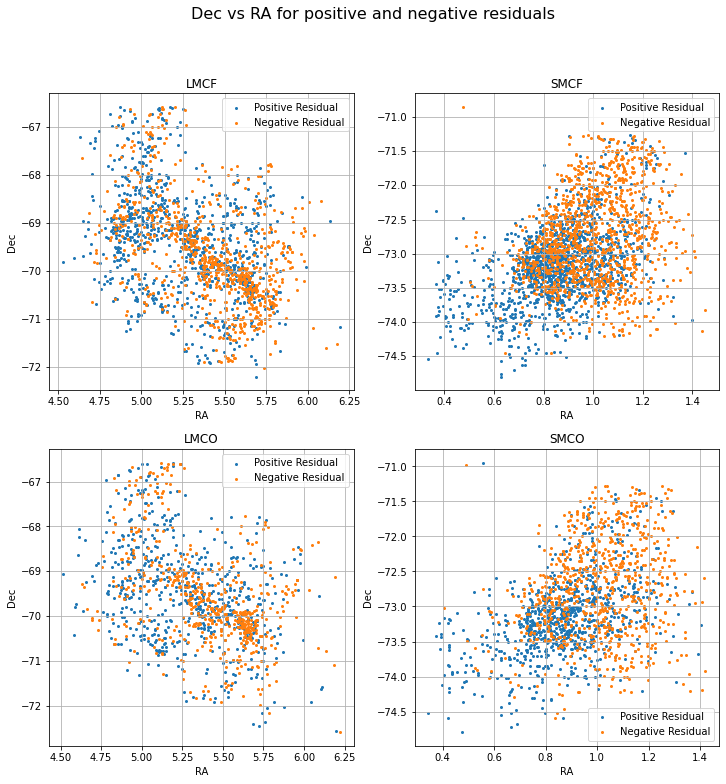

In [94]:
# YOUR CODE HERE

# Function to return the RA and DEC for positive and negative residuals separately
def signed_residual(ra, dec, res):
  ra_pos = []
  ra_neg = []
  dec_pos = []
  dec_neg = []

  ra_pos = np.array(ra_pos)
  ra_neg = np.array(ra_neg)
  dec_pos = np.array(dec_pos)
  dec_neg = np.array(dec_neg)

  for i in range(res.size):
    if (res[i])<0:
      ra_neg = np.append(ra_neg, [ra[i]])
      dec_neg = np.append(dec_neg, [dec[i]])
    else:
      ra_pos = np.append(ra_pos, [ra[i]])
      dec_pos = np.append(dec_pos, [dec[i]])
  return ([ra_pos, dec_pos, ra_neg, dec_neg])

# LMCF
ra1 = lmcf["RA0"].to_numpy()
dec1 = lmcf["Decl0"].to_numpy()

A = signed_residual(ra1, dec1, res1)
fig, ax = plt.subplots(2, 2,figsize=(12,12))

ax[0][0].scatter(A[0], A[1], s = 4, label = "Positive Residual")
ax[0][0].scatter(A[2], (A[3]), s= 4)
ax[0][0].grid()
ax[0][0].set_title(r'LMCF')
ax[0][0].set_xlabel(r"RA")
ax[0][0].set_ylabel(r"Dec")

ax[0][0].legend(["Positive Residual", "Negative Residual"])


# SMCF
ra2 = smcf["RA0"].to_numpy()
dec2 = smcf["Decl0"].to_numpy()

A = signed_residual(ra2, dec2, res2)
ax[0][1].scatter(A[0], A[1], s = 4)
ax[0][1].scatter(A[2], (A[3]), s= 4)
ax[0][1].grid()
ax[0][1].set_title(r'SMCF')
ax[0][1].set_xlabel(r"RA")
ax[0][1].set_ylabel(r"Dec")

ax[0][1].legend(["Positive Residual", "Negative Residual"])

# LMCO
ra3 = lmco["RA0"].to_numpy()
dec3 = lmco["Decl0"].to_numpy()

A = signed_residual(ra3, dec3, res3)
ax[1][0].scatter(A[0], A[1], s = 4)
ax[1][0].scatter(A[2], (A[3]), s= 4)
ax[1][0].grid()
ax[1][0].set_title(r'LMCO')
ax[1][0].set_xlabel(r"RA")
ax[1][0].set_ylabel(r"Dec")


ax[1][0].legend(["Positive Residual", "Negative Residual"])

# SMCO
ra4 = smco["RA0"].to_numpy()
dec4 = smco["Decl0"].to_numpy()

A = signed_residual(ra4, dec4, res4)
ax[1][1].scatter(A[0], A[1], s = 4)
ax[1][1].scatter(A[2], (A[3]), s= 4)
ax[1][1].grid()
ax[1][1].set_title(r'SMCO')
ax[1][1].set_xlabel(r"RA")
ax[1][1].set_ylabel(r"Dec")


ax[1][1].legend(["Positive Residual", "Negative Residual"])

fig.suptitle(r"Dec vs RA for positive and negative residuals", size =16)


